In [1]:
%pip install unidecode
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import json
from unidecode import unidecode

In [3]:
ufs = ['RS', 'SC', 'PR']

# Primeiro passo

In [4]:
df_ocorrencia = pd.read_csv("../dados/acidentes/por ocorrencia/datatran_agrupado.csv", sep=",")
df_ocorrencia = df_ocorrencia[df_ocorrencia['uf'].isin(ufs)]
df_ocorrencia.head()

C:\Users\adria\AppData\Local\Temp\ipykernel_15804\1849590759.py:1: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ocorrencia = pd.read_csv("../dados/acidentes/por ocorrencia/datatran_agrupado.csv", sep=",")


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,1,1,2,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,...,0,1,2,3,"-26,65043908","-53,5185463",SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,...,3,1,1,4,"-27,02982303","-48,60115006",SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,"8,4",CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,...,0,1,2,2,"-25,08123277","-48,62449108",SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,...,1,0,3,2,"-27,289373","-50,166328",SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv


In [5]:
df_ocorrencia.shape

(69261, 31)

In [6]:
df_ocorrencia['latitude'] = df_ocorrencia['latitude'].str.replace(',', '.')
df_ocorrencia['longitude'] = df_ocorrencia['longitude'].str.replace(',', '.')

df_ocorrencia = df_ocorrencia.dropna(subset=['latitude'])
df_ocorrencia = df_ocorrencia.dropna(subset=['longitude'])

df_ocorrencia['latitude'] = pd.to_numeric(df_ocorrencia['latitude'], errors='coerce')
df_ocorrencia['longitude'] = pd.to_numeric(df_ocorrencia['longitude'], errors='coerce')
df_ocorrencia.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,...,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,...,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,"8,4",CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,...,0,1,2,2,-25.081233,-48.624491,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,...,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv


# Segundo passo

In [7]:
acidentes = gpd.GeoDataFrame(
    df_ocorrencia,
    geometry=gpd.points_from_xy(df_ocorrencia['longitude'], df_ocorrencia['latitude']),
    crs="EPSG:4326"
)

# Terceiro passo

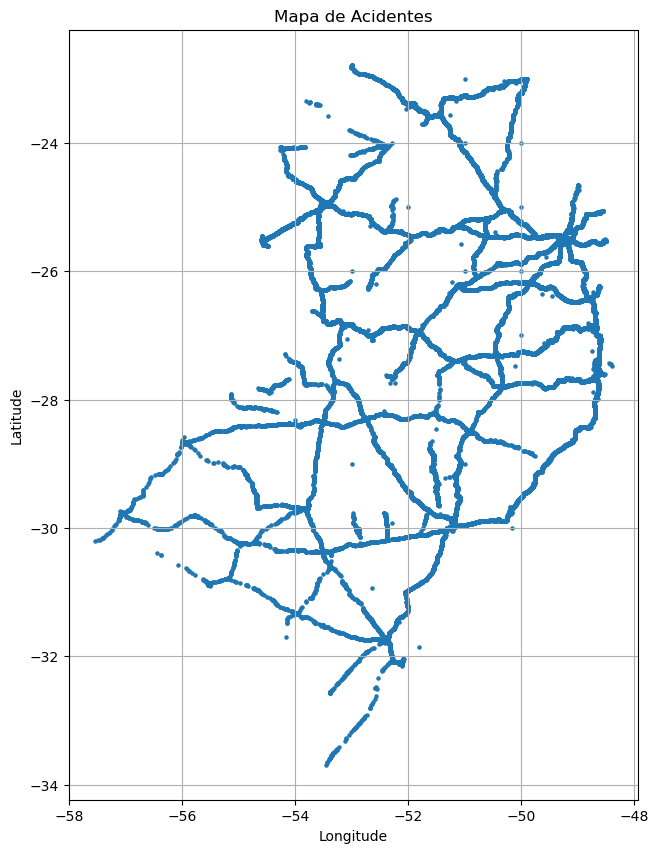

In [8]:
# Assumindo que 'acidentes' já é um GeoDataFrame com geometria definida
acidentes.plot(figsize=(10, 10), markersize=5)

plt.title('Mapa de Acidentes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# Terceiro passo (interativo)

In [9]:
# Ponto central do mapa (pode ser a média das coordenadas)
lat_centro = acidentes['latitude'].mean()
lon_centro = acidentes['longitude'].mean()

# Cria o mapa interativo
mapa = folium.Map(location=[lat_centro, lon_centro], zoom_start=6, tiles='OpenStreetMap')

# Cluster opcional para melhorar visualização
marker_cluster = MarkerCluster().add_to(mapa)

# Adiciona os pontos
for _, row in acidentes.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,  # equivale ao size=0.2 no R
        color='black',  # cor da borda
        fill=True,
        fill_color='deepskyblue',
        fill_opacity=0.8
    ).add_to(marker_cluster)

# Exibe o mapa
#mapa

# Quarto passo

In [10]:
# Leitura dos shapefiles de cada estado
rs = gpd.read_file("shapefiles/RS_Municipios_2024.shp").to_crs(epsg=4326)
sc = gpd.read_file("shapefiles/SC_Municipios_2024.shp").to_crs(epsg=4326)
pr = gpd.read_file("shapefiles/PR_Municipios_2024.shp").to_crs(epsg=4326)

# Unifica os três GeoDataFrames
cidades_sul = gpd.GeoDataFrame(pd.concat([rs, sc, pr], ignore_index=True), crs="EPSG:4326")

In [11]:
acidentes = acidentes.to_crs(epsg=4326)

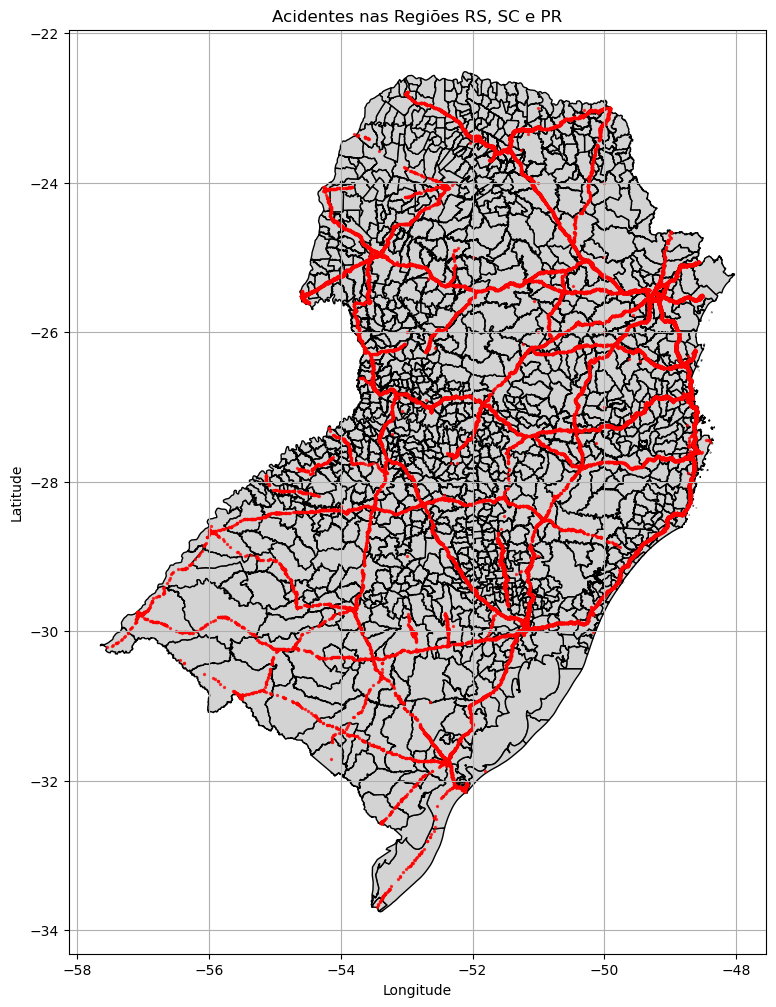

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plotar os polígonos das cidades
cidades_sul.plot(ax=ax, facecolor='lightgray', edgecolor='black')

# Plotar os acidentes como pontos
acidentes.plot(ax=ax, color='red', markersize=2, alpha=0.7)

plt.title("Acidentes nas Regiões RS, SC e PR")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


# Quarto passo (interativo)

In [13]:
# Garante que os GeoDataFrames estão no mesmo CRS
cidades = cidades_sul.to_crs(epsg=4326)
acidentes = acidentes.to_crs(epsg=4326)

# Centro aproximado do mapa
lat_centro = acidentes['geometry'].y.mean()
lon_centro = acidentes['geometry'].x.mean()

# Cria mapa base
mapa = folium.Map(location=[lat_centro, lon_centro], zoom_start=6)

# Adiciona as fronteiras dos municípios (cidades)
folium.GeoJson(
    cidades,
    name="Municípios",
    style_function=lambda feature: {
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0
    }
).add_to(mapa)

# Adiciona os pontos de acidentes
for _, row in acidentes.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mapa)

# Exibir o mapa
#mapa

# Quinto passo

In [14]:
cidades = cidades.rename(columns={"NM_MUN": "municipio"})

In [15]:
cidades['municipio'] = cidades['municipio'].apply(lambda x: unidecode(x).upper().strip() if isinstance(x, str) else x)
cidades.head()

,CD_MUN,municipio,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
0,4316204,RONDINHA,430028,Carazinho,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,252.454,"POLYGON ((-52.91535 -27.88582, -52.91559 -27.8..."
1,4317558,SANTO ANTONIO DO PALMA,430030,Marau,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,126.094,"POLYGON ((-51.99835 -28.43782, -51.99822 -28.4..."
2,4319307,SAO PAULO DAS MISSOES,430024,Cerro Largo,4305,Ijuí,43,Rio Grande do Sul,RS,4,Sul,S,None,None,222.504,"POLYGON ((-54.93828 -28.05575, -54.96888 -28.0..."
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,67.947,"POLYGON ((-53.15215 -27.69941, -53.15493 -27.7..."
4,4318002,SAO BORJA,430017,São Borja,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,3616.674,"POLYGON ((-56.08158 -28.85668, -56.08628 -28.8..."


In [16]:
acidentes.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo,geometry
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (-48.84676 -25.1144)
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,...,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (-53.51855 -26.65044)
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,...,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (-48.60115 -27.02982)
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,"8,4",CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,...,1,2,2,-25.081233,-48.624491,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (-48.62449 -25.08123)
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,...,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (-50.16633 -27.28937)


In [17]:
# Garante o mesmo CRS
cidades = cidades.to_crs(epsg=4326)
acidentes = acidentes.to_crs(epsg=4326)

# Renomeia coluna
cidades = cidades.rename(columns={"NM_MUNICIP": "municipio"})

# Join espacial: acidentes dentro de cada município
cidades_acidentes = gpd.sjoin(cidades, acidentes, how="left", predicate="contains")
cidades_acidentes.head()

,CD_MUN,municipio_left,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo
0,4316204,RONDINHA,430028,Carazinho,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4317558,SANTO ANTONIO DO PALMA,430030,Marau,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4319307,SAO PAULO DAS MISSOES,430024,Cerro Largo,4305,Ijuí,43,Rio Grande do Sul,RS,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,...,0.0,0.0,1.0,1.0,-27.732096,-53.230450,SPRF-RS,DEL08-RS,UOP02-DEL08-RS,datatran2023.csv
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,...,2.0,0.0,0.0,2.0,-27.729799,-53.229969,SPRF-RS,DEL08-RS,UOP02-DEL08-RS,datatran2022.csv


In [18]:

# Conta acidentes por município
# Usar a coluna correta, normalmente 'municipio_left'
cidades_num_acidentes = cidades_acidentes.groupby("municipio_left").size().reset_index(name="num_acidentes")

# Renomear para manter consistência
cidades_num_acidentes = cidades_num_acidentes.rename(columns={"municipio_left": "municipio"})


In [19]:

cidades_com_contagem = cidades.merge(cidades_num_acidentes, on="municipio", how="left")
cidades_com_contagem["num_acidentes"] = cidades_com_contagem["num_acidentes"].fillna(0).astype(int)


In [20]:
cidades.head()

,CD_MUN,municipio,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
0,4316204,RONDINHA,430028,Carazinho,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,252.454,"POLYGON ((-52.91535 -27.88582, -52.91559 -27.8..."
1,4317558,SANTO ANTONIO DO PALMA,430030,Marau,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,126.094,"POLYGON ((-51.99835 -28.43782, -51.99822 -28.4..."
2,4319307,SAO PAULO DAS MISSOES,430024,Cerro Largo,4305,Ijuí,43,Rio Grande do Sul,RS,4,Sul,S,None,None,222.504,"POLYGON ((-54.93828 -28.05575, -54.96888 -28.0..."
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,67.947,"POLYGON ((-53.15215 -27.69941, -53.15493 -27.7..."
4,4318002,SAO BORJA,430017,São Borja,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,3616.674,"POLYGON ((-56.08158 -28.85668, -56.08628 -28.8..."


In [21]:
cidades.shape

(1193, 16)

In [22]:
cidades_com_contagem.head()

,CD_MUN,municipio,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry,num_acidentes
0,4316204,RONDINHA,430028,Carazinho,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,252.454,"POLYGON ((-52.91535 -27.88582, -52.91559 -27.8...",1
1,4317558,SANTO ANTONIO DO PALMA,430030,Marau,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,126.094,"POLYGON ((-51.99835 -28.43782, -51.99822 -28.4...",1
2,4319307,SAO PAULO DAS MISSOES,430024,Cerro Largo,4305,Ijuí,43,Rio Grande do Sul,RS,4,Sul,S,None,None,222.504,"POLYGON ((-54.93828 -28.05575, -54.96888 -28.0...",1
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,67.947,"POLYGON ((-53.15215 -27.69941, -53.15493 -27.7...",6
4,4318002,SAO BORJA,430017,São Borja,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,3616.674,"POLYGON ((-56.08158 -28.85668, -56.08628 -28.8...",71


In [23]:
cidades_com_contagem.to_csv("cidades_num_acidentes.csv", index=False, encoding="utf-8")

# Sexto passo

In [24]:
# Suponha que você queira renomear a coluna 'antigo_nome' para 'novo_nome'
cidades = cidades.rename(columns={"NM_MUN": "municipio"})


In [25]:
# Remover acentuação de toda a coluna 'municipio'
cidades['municipio'] = cidades['municipio'].apply(lambda x: unidecode(x).upper().strip() if isinstance(x, str) else x)

cidades_num_acidentes['municipio'] = cidades_num_acidentes['municipio'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)


In [26]:
print(cidades["municipio"].unique()[:10])
print(cidades_num_acidentes["municipio"].unique()[:10])


['RONDINHA' 'SANTO ANTONIO DO PALMA' 'SAO PAULO DAS MISSOES'
 'LAJEADO DO BUGRE' 'SAO BORJA' 'GARIBALDI' 'LAJEADO' 'NOVA ALVORADA'
 'ARVOREZINHA' 'SAO DOMINGOS DO SUL']
['ABATIA' 'ABDON BATISTA' 'ABELARDO LUZ' 'ACEGUA' 'ADRIANOPOLIS'
 'AGROLANDIA' 'AGRONOMICA' 'AGUA DOCE' 'AGUA SANTA' 'AGUAS DE CHAPECO']


In [27]:
# cidades: GeoDataFrame com geometria dos municípios
# cidades_num_acidentes: DataFrame com ['municipio', 'num_acidentes']

# Junta os dados ao GeoDataFrame original
cidades_com_contagem = cidades.merge(cidades_num_acidentes, on="municipio", how="left")

# Substitui NaN por 0 (sem acidentes)
cidades_com_contagem["num_acidentes"] = cidades_com_contagem["num_acidentes"].fillna(0)

In [28]:
cidades_com_contagem.head()

,CD_MUN,municipio,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry,num_acidentes
0,4316204,RONDINHA,430028,Carazinho,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,252.454,"POLYGON ((-52.91535 -27.88582, -52.91559 -27.8...",1
1,4317558,SANTO ANTONIO DO PALMA,430030,Marau,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,126.094,"POLYGON ((-51.99835 -28.43782, -51.99822 -28.4...",1
2,4319307,SAO PAULO DAS MISSOES,430024,Cerro Largo,4305,Ijuí,43,Rio Grande do Sul,RS,4,Sul,S,None,None,222.504,"POLYGON ((-54.93828 -28.05575, -54.96888 -28.0...",1
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,67.947,"POLYGON ((-53.15215 -27.69941, -53.15493 -27.7...",6
4,4318002,SAO BORJA,430017,São Borja,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,3616.674,"POLYGON ((-56.08158 -28.85668, -56.08628 -28.8...",71


In [29]:
%pip install mapclassify

Note: you may need to restart the kernel to use updated packages.


c:\Users\adria\anaconda3\Lib\site-packages\mapclassify\classifiers.py:1767: UserWarning: Not enough unique values in array to form 8 classes. Setting k to 5.
  self.bins = quantile(y, k=k)


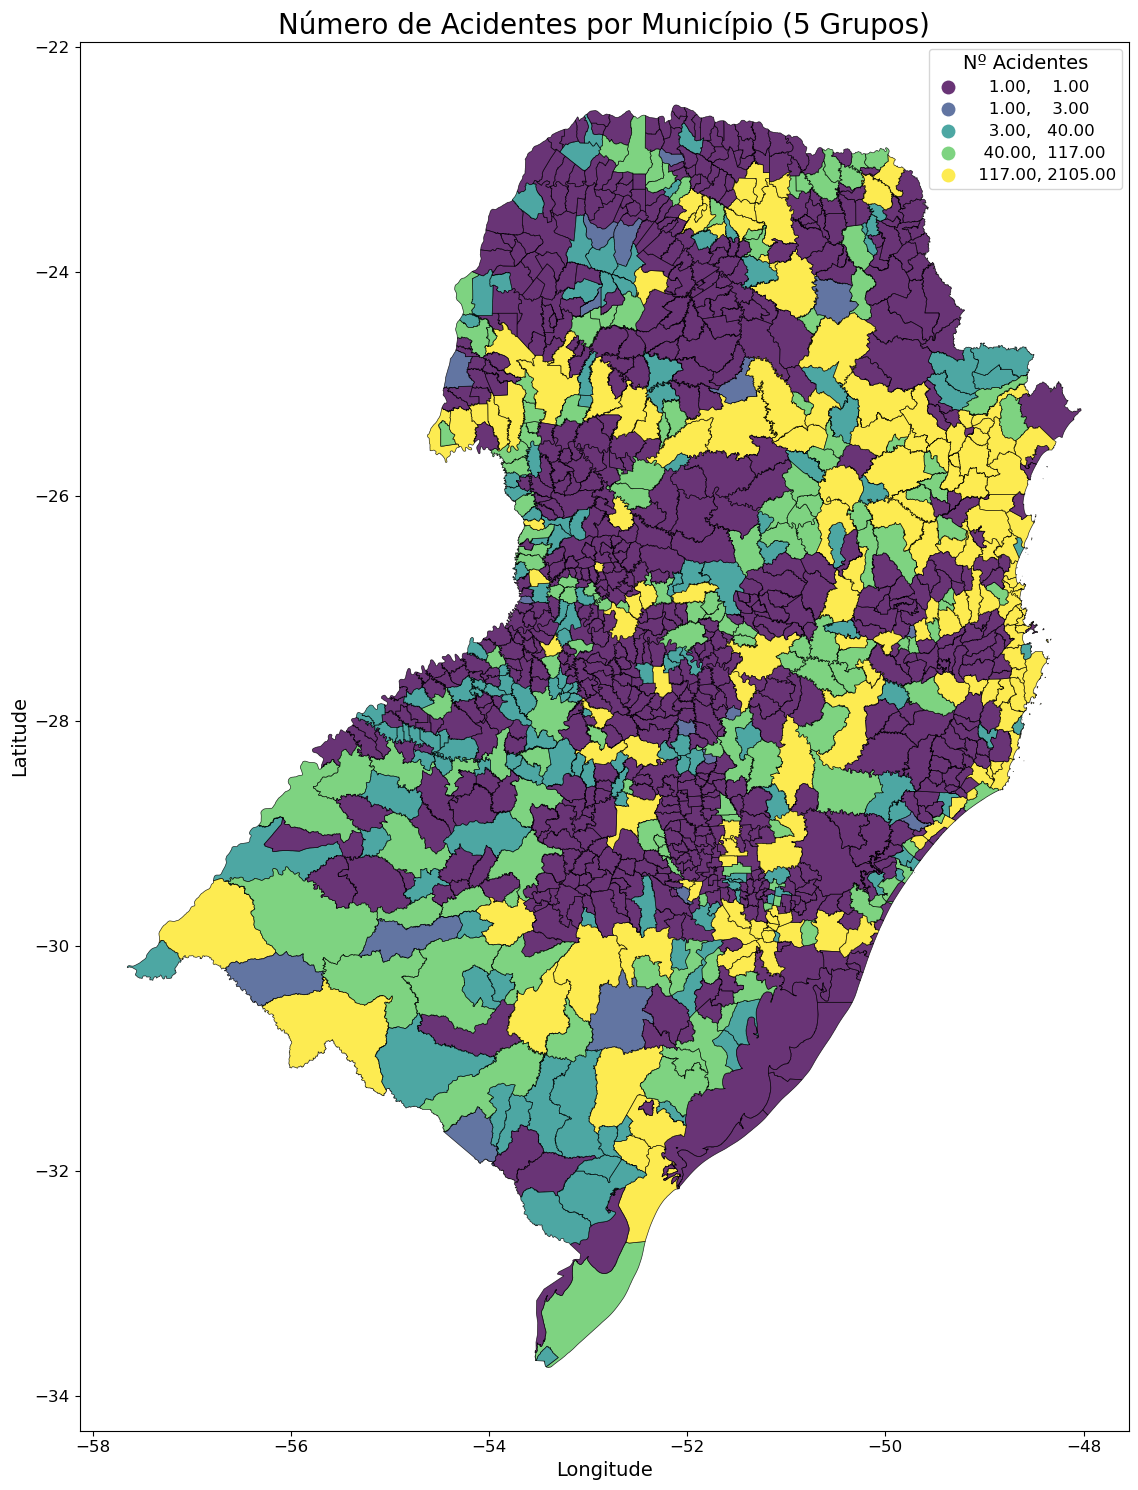

In [30]:
import matplotlib.pyplot as plt
import mapclassify

fig, ax = plt.subplots(figsize=(16, 15))

# Plota e guarda a legenda
legend = cidades_com_contagem.plot(
    column="num_acidentes",
    cmap="viridis",
    scheme="Quantiles",
    k=8,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.8,
    legend=True,
    ax=ax
)

# Título e eixos
ax.set_title("Número de Acidentes por Município (5 Grupos)", fontsize=20)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)
ax.tick_params(labelsize=12)  # eixos x e y

# Aumenta o texto da legenda
leg = ax.get_legend()
if leg:
    for text in leg.get_texts():
        text.set_fontsize(12)
    leg.set_title("Nº Acidentes", prop={"size": 14})

plt.tight_layout()
plt.show()


c:\Users\adria\anaconda3\Lib\site-packages\mapclassify\classifiers.py:1767: UserWarning: Not enough unique values in array to form 8 classes. Setting k to 5.
  self.bins = quantile(y, k=k)


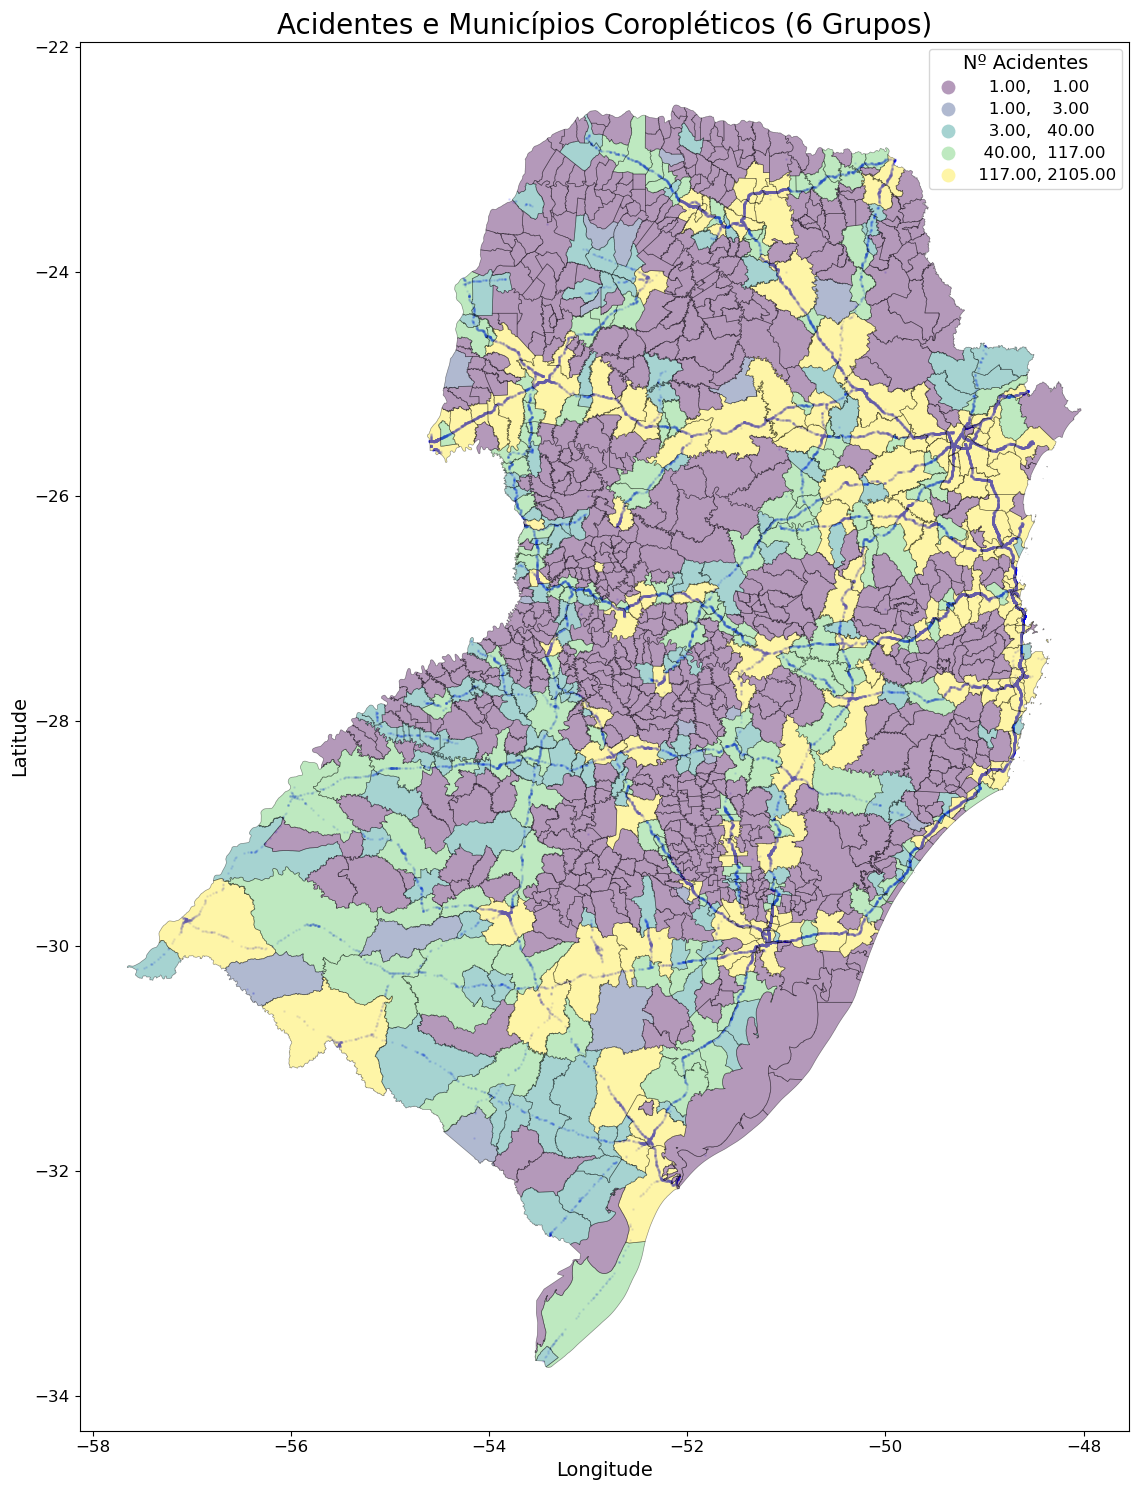

In [31]:
import matplotlib.pyplot as plt
import mapclassify

fig, ax = plt.subplots(figsize=(16, 15))

# 1. Pontos de acidentes
acidentes.plot(
    ax=ax,
    markersize=1,       # Tamanho pequeno
    alpha=0.1,
    color='blue',
    label='Acidentes'
)

# 2. Municípios com contagem (corooplético)
cidades_com_contagem.plot(
    ax=ax,
    column='num_acidentes',
    cmap='viridis',
    scheme='Quantiles',
    k=8,
    alpha=0.4,
    edgecolor='black',
    linewidth=0.5,
    legend=True
)

# Título e eixos
ax.set_title("Acidentes e Municípios Coropléticos (6 Grupos)", fontsize=20)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)
ax.tick_params(labelsize=12)

# Aumentar fontes da legenda
leg = ax.get_legend()
if leg:
    for text in leg.get_texts():
        text.set_fontsize(12)
    leg.set_title("Nº Acidentes", prop={"size": 14})

plt.tight_layout()
plt.show()
